# CSE 469 Project
Team Member 1: Jyothismaria Joseph (jyothism@buffalo.edu)
Team Member 2: Ibrahim Allahbuksh (iallahbu@buffalo.edu)
Team Member 3: Cailey Shum (caileysh@buffalo.edu)

### Project Contributions
Jyothismaria: Data pre-processing, implemented data mining experiments, and found "Password Strength Classifier Dataset".
Ibrahim: Implementing data mining algorithm.
Cailey: Found "Bad Passwords (Never Use them)" dataset, calculated datasets statistics and plotted datasets graphs, formatted and added explainations to project report, and created the project presentation.

## Introduction
### Problem: 
   Using classification to determine how strong a bad password is based on time it takes to crack online and offline. 

### Impact: 
   To determine the strongest passwords within the dataset and associate which ones are the best and worst.

## Formulation
Input: A dataset that uses the following features for classification: 
* Password Length
* Count of Characters in Password
* Count of Numbers in Password
* Count of Special Characters in Password 
* Character Length in Password

Expected Output: A decision tree that returns whether or not the password is weak, medium, or strong in password strength.

## Datasets
Datasets provided by Kaggle.com
* "Bad Passwords (Never Use them)":
    * https://www.kaggle.com/datasets/sujaykapadnis/bad-passwords-never-use-them
* "Password Strength Classifier Dataset":
    * https://www.kaggle.com/datasets/bhavikbb/password-strength-classifier-dataset/data  

## Data Pre-Processing

* For pre-processing, both dataset categories were turned into features and any missing values were dropped.
* When we first started the project, we intended on using all features in the Kaggle dataset. 
    * In the "Bad Passwords (Never Use them)" dataset, we wanted to use the feature of online and offline cracking time.
         * Therefore, all time units needed to be standardized into minutes.
* However, we then decided to merge a different data from Kaggle "Password Strength Classifier Dataset" and subset the dataset to get the following features:
    * Password Length
    * Count of Characters in Password
    * Count of Numbers in Password
    * Count of Special Characters in Password 
    * Character Length in Password

In [325]:
#Importing libraries 
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from collections import Counter

In [326]:
df_pswd = pd.read_csv("passwords.csv")

In [327]:
#Cleaning
#Removing missing values
#Removing wrong entries in strength
df_pswd.isna().sum()

rank                 7
password             7
category             7
value                7
time_unit            7
offline_crack_sec    7
rank_alt             7
strength             7
font_size            7
dtype: int64

In [328]:
#dropping the rows that have missing value
rows = list(df_pswd[df_pswd["strength"].isna()].index)
df_pswd = df_pswd.drop(rows)

In [329]:
#strength supposed to be from 1 to 10 any values other than that need to be removed
df_pswd["strength"].describe()

count    500.000000
mean       7.432000
std        5.415536
min        0.000000
25%        6.000000
50%        7.000000
75%        8.000000
max       48.000000
Name: strength, dtype: float64

In [330]:
rows = list(df_pswd[df_pswd["strength"] > 10].index)
df_pswd = df_pswd.drop(rows)

In [331]:
# categorizing strength into 3 categories 
# 0 -> weak
# 1 -> medium
# 2 -> strong
strength_bin = []
strength = list(df_pswd["strength"])
for x in strength:
    if(x >= 0 and x <= 3):
        strength_bin.append(0)
    elif(x >= 4 and x <= 7):
        strength_bin.append(1)
    elif(x >= 8 and x <= 10):
        strength_bin.append(2)
df_pswd["strength_bin"] = strength_bin
df_pswd

rank  password             category  value time_unit  offline_crack_sec  \
0      1.0  password     password-related   6.91     years       2.170000e+00   
1      2.0    123456  simple-alphanumeric  18.52   minutes       1.110000e-05   
2      3.0  12345678  simple-alphanumeric   1.29      days       1.110000e-03   
3      4.0      1234  simple-alphanumeric  11.11   seconds       1.110000e-07   
4      5.0    qwerty  simple-alphanumeric   3.72      days       3.210000e-03   
..     ...       ...                  ...    ...       ...                ...   
494  495.0    hotrod           cool-macho   3.72      days       3.210000e-03   
495  496.0    reddog           cool-macho   3.72      days       3.210000e-03   
496  497.0  alexande                 name   6.91     years       2.170000e+00   
497  498.0   college            nerdy-pop   3.19    months       8.350000e-02   
498  499.0    jester                 name   3.72      days       3.210000e-03   

     rank_alt  strength  font_size  strength_bin  
0         1.0       8.0       11.0             2  
1         2.0       4.0        8.0             1  
2         3.0       4.0        8.0             1  
3         4.0       4.0        8.0             1  
4         5.0       8.0       11.0             2  
..        ...       ...        ...           ...  
494     497.0       7.0       11.0             1  
495     498.0       6.0       10.0             1  
496     499.0       9.0       12.0             2  
497     500.0       7.0       11.0             1  
498     501.0       7.0       11.0             1  

[485 rows x 10 columns]

In [332]:
df_pswd["time_unit"].unique()

array(['years', 'minutes', 'days', 'seconds', 'months', 'hours', 'weeks'],
      dtype=object)

In [333]:
#standardizing the time units for value to mins

#using standard values for time:
    # 1 year = 525600 mins
    # 1 day = 1440 min
    # 1 month = 43800
    # 1 week = 10080
    # 1 sec = 1/60 min
    
online_attack = []
offline_attack = []
df_online = list(df_pswd["value"])
df_offline = list(df_pswd["offline_crack_sec"])
df_time = list(df_pswd["time_unit"])
for i in range(0, len(df_time)):
    if(df_time[i] == 'years'):
        online_attack.append(df_online[i]* 525600)
    elif(df_time[i] == 'days'):
        online_attack.append(df_online[i]* 1440)
    elif(df_time[i] == 'months'):
        online_attack.append(df_online[i]* 43800)
    elif(df_time[i] == 'hours'):
        online_attack.append(df_online[i]* 60)
    elif(df_time[i] == 'weeks'):
        online_attack.append(df_online[i]* 10080)
    elif(df_time[i] == 'seconds'):
        online_attack.append(df_online[i]*(1/60))
    elif(df_time[i] == 'minutes'):
        online_attack.append(df_online[i])
    offline_attack.append(df_offline[i]/60)
df_pswd["online_crack_min"] = online_attack
df_pswd["offline_crack_min"] = offline_attack

In [334]:
is_alpha = []
is_numeric = []
is_speacial = [] 
for i in df_pswd["password"]:
    char_dict = {}
    is_special_tal = 0
    is_numeric_tal = 0
    is_alpha_tal = 0
    for j in i:
        if j.isdigit() == True:
            is_numeric_tal = is_numeric_tal +1   
        else:
            if j.isalpha() == True:
                is_alpha_tal = is_alpha_tal +1
            else:
                is_special_tal = is_special_tal +1
                print(j)
    is_alpha.append(is_alpha_tal)
    is_numeric.append(is_numeric_tal)
    is_speacial.append(is_special_tal)
df_pswd["no_of_numeric"] = is_numeric
df_pswd["no_of_special_c"] = is_speacial
df_pswd["no_of_char"] = is_alpha
df_pswd

rank  password             category  value time_unit  offline_crack_sec  \
0      1.0  password     password-related   6.91     years       2.170000e+00   
1      2.0    123456  simple-alphanumeric  18.52   minutes       1.110000e-05   
2      3.0  12345678  simple-alphanumeric   1.29      days       1.110000e-03   
3      4.0      1234  simple-alphanumeric  11.11   seconds       1.110000e-07   
4      5.0    qwerty  simple-alphanumeric   3.72      days       3.210000e-03   
..     ...       ...                  ...    ...       ...                ...   
494  495.0    hotrod           cool-macho   3.72      days       3.210000e-03   
495  496.0    reddog           cool-macho   3.72      days       3.210000e-03   
496  497.0  alexande                 name   6.91     years       2.170000e+00   
497  498.0   college            nerdy-pop   3.19    months       8.350000e-02   
498  499.0    jester                 name   3.72      days       3.210000e-03   

     rank_alt  strength  font_size  strength_bin  online_crack_min  \
0         1.0       8.0       11.0             2      3.631896e+06   
1         2.0       4.0        8.0             1      1.852000e+01   
2         3.0       4.0        8.0             1      1.857600e+03   
3         4.0       4.0        8.0             1      1.851667e-01   
4         5.0       8.0       11.0             2      5.356800e+03   
..        ...       ...        ...           ...               ...   
494     497.0       7.0       11.0             1      5.356800e+03   
495     498.0       6.0       10.0             1      5.356800e+03   
496     499.0       9.0       12.0             2      3.631896e+06   
497     500.0       7.0       11.0             1      1.397220e+05   
498     501.0       7.0       11.0             1      5.356800e+03   

     offline_crack_min  no_of_numeric  no_of_special_c  no_of_char  
0         3.616667e-02              0                0           8  
1         1.850000e-07              6                0           0  
2         1.850000e-05              8                0           0  
3         1.850000e-09              4                0           0  
4         5.350000e-05              0                0           6  
..                 ...            ...              ...         ...  
494       5.350000e-05              0                0           6  
495       5.350000e-05              0                0           6  
496       3.616667e-02              0                0           8  
497       1.391667e-03              0                0           7  
498       5.350000e-05              0                0           6  

[485 rows x 15 columns]

In [335]:
#creating a new feature based on password column
password_length = []
for i in list(df_pswd["password"]):
    password_length.append(len(i))
df_pswd["password_length"] = password_length

In [336]:
bad_pass_features = df_pswd.drop(columns= ['value','rank', 'offline_crack_sec', 'rank_alt', 'strength', 'strength_bin','time_unit'], axis =1)
bad_pass_label = df_pswd["strength_bin"]

In [347]:
bad_pass_features

password             category  font_size  online_crack_min  \
0    password     password-related       11.0      3.631896e+06   
1      123456  simple-alphanumeric        8.0      1.852000e+01   
2    12345678  simple-alphanumeric        8.0      1.857600e+03   
3        1234  simple-alphanumeric        8.0      1.851667e-01   
4      qwerty  simple-alphanumeric       11.0      5.356800e+03   
..        ...                  ...        ...               ...   
494    hotrod           cool-macho       11.0      5.356800e+03   
495    reddog           cool-macho       10.0      5.356800e+03   
496  alexande                 name       12.0      3.631896e+06   
497   college            nerdy-pop       11.0      1.397220e+05   
498    jester                 name       11.0      5.356800e+03   

     offline_crack_min  no_of_numeric  no_of_special_c  no_of_char  \
0         3.616667e-02              0                0           8   
1         1.850000e-07              6                0           0   
2         1.850000e-05              8                0           0   
3         1.850000e-09              4                0           0   
4         5.350000e-05              0                0           6   
..                 ...            ...              ...         ...   
494       5.350000e-05              0                0           6   
495       5.350000e-05              0                0           6   
496       3.616667e-02              0                0           8   
497       1.391667e-03              0                0           7   
498       5.350000e-05              0                0           6   

     password_length  password-related  simple_alphamuric  animal  sport  \
0                  8                 1                  0       0      0   
1                  6                 0                  1       0      0   
2                  8                 0                  1       0      0   
3                  4                 0                  1       0      0   
4                  6                 0                  1       0      0   
..               ...               ...                ...     ...    ...   
494                6                 0                  0       0      0   
495                6                 0                  0       0      0   
496                8                 0                  0       0      0   
497                7                 0                  0       0      0   
498                6                 0                  0       0      0   

     cool_macho  name  fluffy  food  nerdy_pop  rebellious_rude  
0             0     0       0     0          0                0  
1             0     0       0     0          0                0  
2             0     0       0     0          0                0  
3             0     0       0     0          0                0  
4             0     0       0     0          0                0  
..          ...   ...     ...   ...        ...              ...  
494           1     0       0     0          0                0  
495           1     0       0     0          0                0  
496           0     1       0     0          0                0  
497           0     0       0     0          1                0  
498           0     1       0     0          0                0  

[485 rows x 19 columns]

In [348]:
bad_pass_label

0      2
1      1
2      1
3      1
4      2
      ..
494    1
495    1
496    2
497    1
498    1
Name: strength_bin, Length: 485, dtype: int64

In [351]:
df_category = bad_pass_features["category"]
def list_category(category):  
    type = [] 
    for i in df_category:
        if(i == category):
            type.append(1)
        else:
            type.append(0)
    return type
password_related = list_category("password-related")
bad_pass_features["password-related"] = password_related
simple_alphamuric = list_category("simple-alphanumeric")
bad_pass_features["simple_alphamuric"] = simple_alphamuric
animal = list_category("animal")
bad_pass_features["animal"] = animal
sport =  list_category("sport")
bad_pass_features["sport"] = sport
cool_macho =  list_category("cool-macho")
bad_pass_features["cool_macho"] = cool_macho
name =  list_category("name")
bad_pass_features["name"] = name
fluffy = list_category("fluffy")
bad_pass_features["fluffy"] = fluffy
food =  list_category("food")
bad_pass_features["food"] = food
nerdy_pop =  list_category("nerdy-pop")
bad_pass_features["nerdy_pop"] =  nerdy_pop
rebellious_rude = list_category("rebellious-rude")
bad_pass_features["rebellious_rude"] = rebellious_rude

In [352]:
#Merging "Password Strength Classifier" Dataset with "Bad Passwords (Never Use them)" Dataset

In [353]:
df_pswd_2 = pd.read_csv("passwords_second.csv")

In [354]:
is_alpha = []
is_numeric = []
is_speacial = [] 
for i in df_pswd_2["password"]:
    char_dict = {}
    is_special_tal = 0
    is_numeric_tal = 0
    is_alpha_tal = 0
    for j in i:
        if j.isdigit() == True:
            is_numeric_tal = is_numeric_tal +1   
        else:
            if j.isalpha() == True:
                is_alpha_tal = is_alpha_tal +1
            else:
                is_special_tal = is_special_tal +1
    is_alpha.append(is_alpha_tal)
    is_numeric.append(is_numeric_tal)
    is_speacial.append(is_special_tal)
df_pswd_2["no_of_numeric"] = is_numeric
df_pswd_2["no_of_special_c"] = is_speacial
df_pswd_2["no_of_char"] = is_alpha
df_pswd_2

password  strength  no_of_numeric  no_of_special_c  no_of_char
0            yrtzuab476         1              3                0           7
1      yEdnN9jc1NgzkkBP         2              2                0          14
2              sarita99         1              2                0           6
3        Suramerica2015         2              4                0          10
4      PPRbMvDIxMQ19TMo         2              2                0          14
...                 ...       ...            ...              ...         ...
99995         aulona044         1              3                0           6
99996       5201314ding         1              7                0           4
99997        isaac19725         1              5                0           5
99998            toji25         0              2                0           4
99999       midnight000         1              3                0           8

[100000 rows x 5 columns]

In [355]:
password_length = []
for i in list(df_pswd_2["password"]):
    password_length.append(len(i))
df_pswd_2["password_length"] = password_length

In [356]:
df_pswd_2["strength_bin"] = df_pswd_2["strength"]

In [357]:
df_pswd_2 = df_pswd_2.drop(columns= [ "strength"], axis= 1)

In [358]:
df_pswd_1 = bad_pass_features[["password", "no_of_numeric", "no_of_special_c", "no_of_char", "password_length"]]
df_pswd_1["strength_bin"] = bad_pass_label

/var/folders/jc/sg3z6y2956g1hgbnk66lw_680000gn/T/ipykernel_66567/3268181770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pswd_1["strength_bin"] = bad_pass_label


In [359]:
df_pswd_merged = [df_pswd_1, df_pswd_2]
df_pswd_merged = pd.concat(df_pswd_merged)

In [360]:
df_pswd_merged

password  no_of_numeric  no_of_special_c  no_of_char  \
0         password              0                0           8   
1           123456              6                0           0   
2         12345678              8                0           0   
3             1234              4                0           0   
4           qwerty              0                0           6   
...            ...            ...              ...         ...   
99995    aulona044              3                0           6   
99996  5201314ding              7                0           4   
99997   isaac19725              5                0           5   
99998       toji25              2                0           4   
99999  midnight000              3                0           8   

       password_length  strength_bin  
0                    8             2  
1                    6             1  
2                    8             1  
3                    4             1  
4                    6             2  
...                ...           ...  
99995                9             1  
99996               11             1  
99997               10             1  
99998                6             0  
99999               11             1  

[100485 rows x 6 columns]

In [361]:
from collections import Counter
same_c_occurence = []
for i in df_pswd_merged["password"]:
    print(i)
    occurence = Counter(i)
    occurence = max(occurence.values() )
    same_c_occurence.append((occurence))

df_pswd_merged["Character_occurence"] = same_c_occurence

password
123456
12345678
1234
qwerty
12345
dragon
baseball
football
letmein
monkey
696969
mustang
michael
shadow
master
jennifer
111111
2000
jordan
superman
harley
1234567
hunter
ranger
buster
thomas
tigger
robert
soccer
batman
test
pass
killer
hockey
george
charlie
andrew
michelle
love
sunshine
jessica
6969
pepper
daniel
access
123456789
654321
joshua
maggie
starwars
silver
william
dallas
yankees
123123
ashley
666666
hello
amanda
orange
biteme
freedom
computer
sexy
thunder
nicole
ginger
heather
hammer
summer
corvette
taylor
austin
1111
merlin
matthew
121212
golfer
cheese
princess
martin
chelsea
patrick
richard
diamond
yellow
bigdog
secret
asdfgh
sparky
cowboy
camaro
anthony
matrix
falcon
iloveyou
bailey
guitar
jackson
purple
scooter
phoenix
aaaaaa
morgan
tigers
porsche
mickey
maverick
cookie
nascar
peanut
justin
131313
money
samantha
panties
steelers
joseph
snoopy
boomer
whatever
iceman
smokey
gateway
dakota
cowboys
eagles
chicken
black
zxcvbn
please
andrea
ferrari
knight
hardcore
mel

In [362]:
merged_features = df_pswd_merged.drop(columns= ['strength_bin','password'], axis =1)
merged_labels = df_pswd_merged["strength_bin"]

## Dataset Statistics

## Key Statistics from Bad Password Dataset:
* Most frequent password category in the dataset is ones that involves a name (i.e: Thomas, Robert, Batman), which has a frequency of 35%.
* The average time to crack a password offline takes roughly 0.3 seconds.
* The average strength of a password on a scale of 1, being the weakest, to 10, being the strongest, is a 6. 
    * However, the most frequent password strength in this dataset has a strength of 8.

In [363]:
df_pswd[["category", "offline_crack_sec","strength","online_crack_min", "password_length"]].describe(include="all")

category  offline_crack_sec    strength  online_crack_min  \
count       485       4.850000e+02  485.000000      4.850000e+02   
unique       10                NaN         NaN               NaN   
top        name                NaN         NaN               NaN   
freq        183                NaN         NaN               NaN   
mean        NaN       2.671227e-01    6.606186      4.470659e+05   
std         NaN       6.889035e-01    2.307812      1.153012e+06   
min         NaN       1.110000e-07    0.000000      1.851667e-01   
25%         NaN       3.210000e-03    6.000000      5.356800e+03   
50%         NaN       3.210000e-03    7.000000      5.356800e+03   
75%         NaN       8.350000e-02    8.000000      1.397220e+05   
max         NaN       2.170000e+00   10.000000      3.631896e+06   

        password_length  
count        485.000000  
unique              NaN  
top                 NaN  
freq                NaN  
mean           6.181443  
std            1.052381  
min            4.000000  
25%            6.000000  
50%            6.000000  
75%            7.000000  
max            9.000000

Text(0, 0.5, 'Frequency')

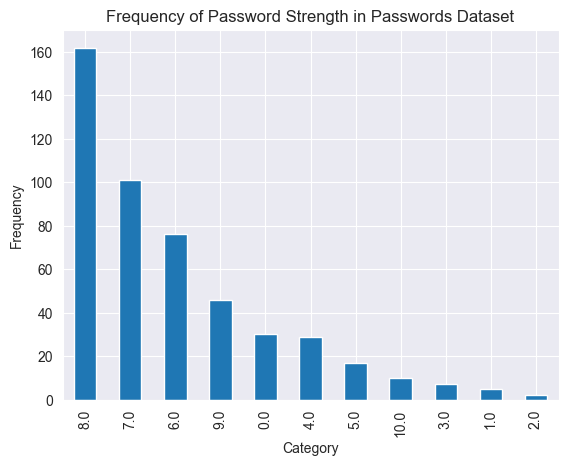

In [364]:
df_pswd["strength"].value_counts().plot(kind ='bar')
plt.title("Frequency of Password Strength in Passwords Dataset")
plt.xlabel("Category")
plt.ylabel("Frequency")

# Key Statistics from Password Classifier Dataset:

In [365]:
df_pswd_2[["no_of_numeric","no_of_special_c","no_of_char","password_length","strength_bin"]].describe(include="all")

no_of_numeric  no_of_special_c     no_of_char  password_length  \
count   100000.00000    100000.000000  100000.000000    100000.000000   
mean         3.18047         0.046060       6.749010         9.975540   
std          1.99945         0.334215       3.090743         2.766384   
min          0.00000         0.000000       0.000000         1.000000   
25%          2.00000         0.000000       5.000000         8.000000   
50%          3.00000         0.000000       6.000000         9.000000   
75%          4.00000         0.000000       8.000000        11.000000   
max         22.00000        13.000000      32.000000        45.000000   

        strength_bin  
count  100000.000000  
mean        0.988660  
std         0.507044  
min         0.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
max         2.000000

# Key Statistics from Password Classifier Datasets:
* When combined, the average password character length in our combined dataset is nine characters.
* The bad passwords in this dataset were classified as a password strength of medium.

Text(0, 0.5, 'Frequency')

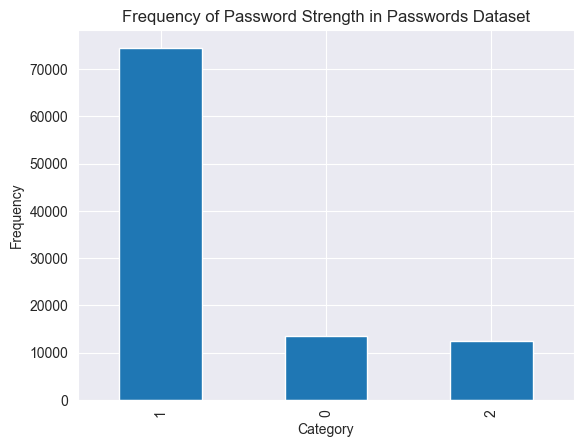

In [366]:
df_pswd_merged["strength_bin"].value_counts().plot(kind ='bar')
plt.title("Frequency of Password Strength in Passwords Dataset")
plt.xlabel("Category")
plt.ylabel("Frequency")

## Algorithm and Experiments

* We originally intended to use the following features in the "Bad Password Dataset":
    * Online Cracking Time in Minutes 
    * Offline Cracking Time in Minutes
    * Password Length
* However, we realized the accuracy of the classification was 64.4%, where the lowest recall percentage was with the level that had the strongest password strength.

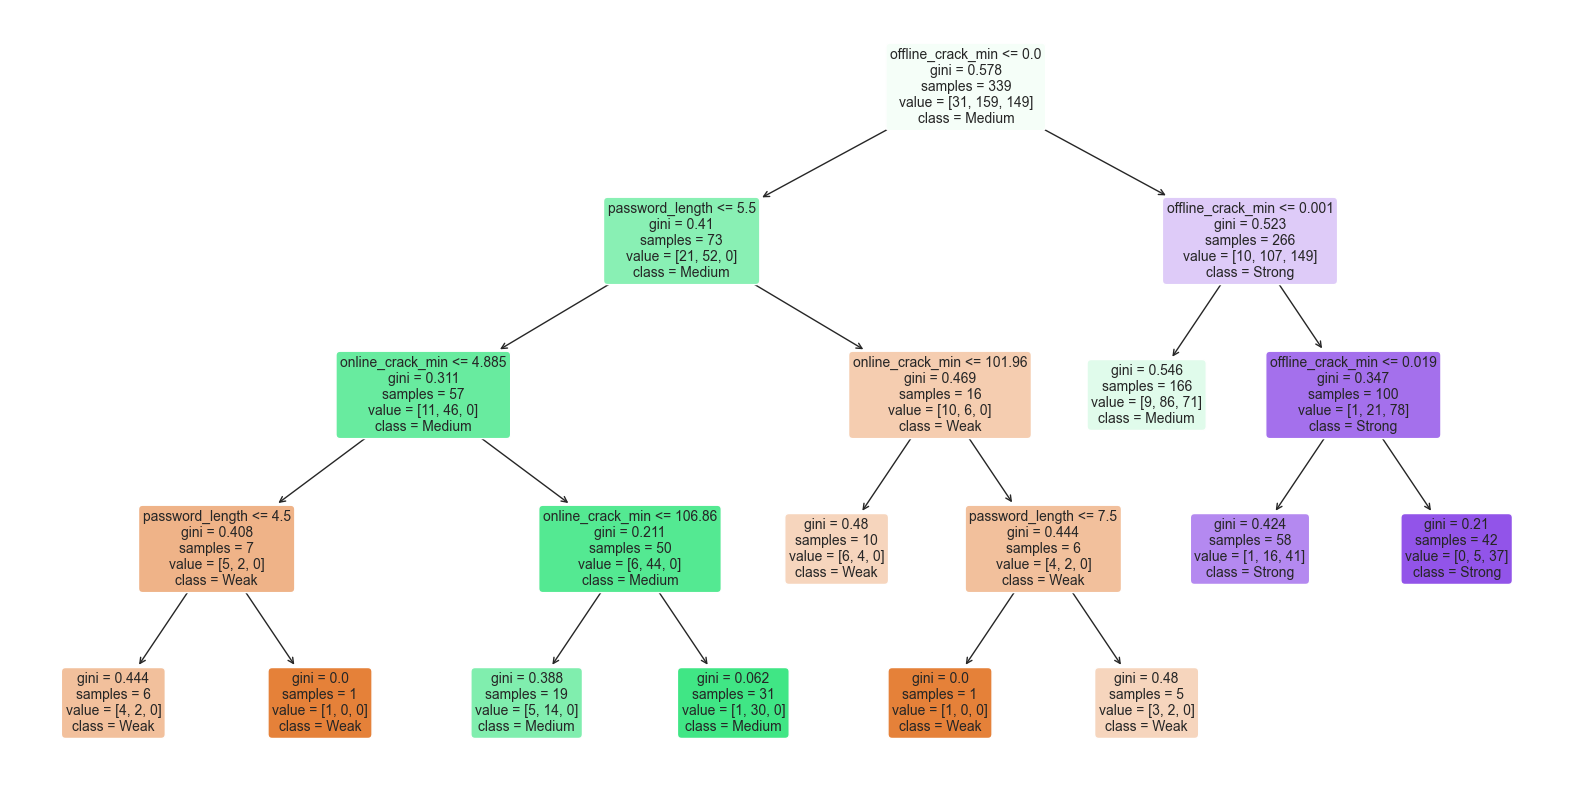

Accuracy: 0.6438356164383562
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        13
           1       0.58      0.80      0.67        64
           2       0.79      0.49      0.61        69

    accuracy                           0.64       146
   macro avg       0.66      0.66      0.64       146
weighted avg       0.68      0.64      0.64       146

Confusion Matrix:
[[ 9  3  1]
 [ 5 51  8]
 [ 1 34 34]]


In [367]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns

X = df_pswd[['online_crack_min', 'offline_crack_min', 'password_length']]
label = df_pswd['strength_bin']  


X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

plt.figure(figsize=(20,10)) 
plot_tree(clf, 
          feature_names=X.columns,  # This should be the names of your features
          class_names=["Weak", "Medium", "Strong"],
          filled=True, rounded=True,
          fontsize=10)
plt.show()


# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")


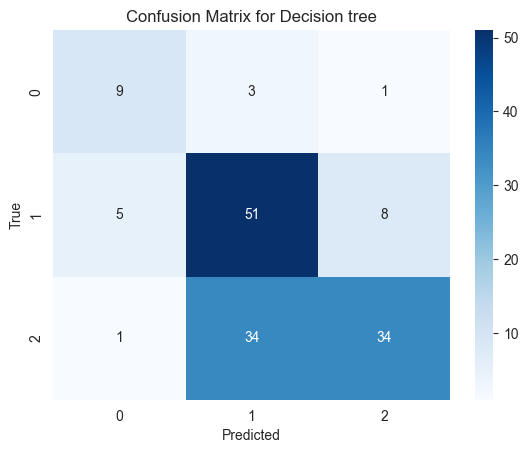

In [368]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Decision tree")
plt.show()

* We also tested if password category as as feature would make the classification more accurate when using the "Bad Password" Dataset. 
* When password categories were used s a feature, the accuracy decreased by six percentage points. 
    * All recalls for password strength decreased; however, the recall for weak password strength decreased significantly by twenty percentage points.

In [369]:
bad_pass_features

password             category  font_size  online_crack_min  \
0    password     password-related       11.0      3.631896e+06   
1      123456  simple-alphanumeric        8.0      1.852000e+01   
2    12345678  simple-alphanumeric        8.0      1.857600e+03   
3        1234  simple-alphanumeric        8.0      1.851667e-01   
4      qwerty  simple-alphanumeric       11.0      5.356800e+03   
..        ...                  ...        ...               ...   
494    hotrod           cool-macho       11.0      5.356800e+03   
495    reddog           cool-macho       10.0      5.356800e+03   
496  alexande                 name       12.0      3.631896e+06   
497   college            nerdy-pop       11.0      1.397220e+05   
498    jester                 name       11.0      5.356800e+03   

     offline_crack_min  no_of_numeric  no_of_special_c  no_of_char  \
0         3.616667e-02              0                0           8   
1         1.850000e-07              6                0           0   
2         1.850000e-05              8                0           0   
3         1.850000e-09              4                0           0   
4         5.350000e-05              0                0           6   
..                 ...            ...              ...         ...   
494       5.350000e-05              0                0           6   
495       5.350000e-05              0                0           6   
496       3.616667e-02              0                0           8   
497       1.391667e-03              0                0           7   
498       5.350000e-05              0                0           6   

     password_length  password-related  simple_alphamuric  animal  sport  \
0                  8                 1                  0       0      0   
1                  6                 0                  1       0      0   
2                  8                 0                  1       0      0   
3                  4                 0                  1       0      0   
4                  6                 0                  1       0      0   
..               ...               ...                ...     ...    ...   
494                6                 0                  0       0      0   
495                6                 0                  0       0      0   
496                8                 0                  0       0      0   
497                7                 0                  0       0      0   
498                6                 0                  0       0      0   

     cool_macho  name  fluffy  food  nerdy_pop  rebellious_rude  
0             0     0       0     0          0                0  
1             0     0       0     0          0                0  
2             0     0       0     0          0                0  
3             0     0       0     0          0                0  
4             0     0       0     0          0                0  
..          ...   ...     ...   ...        ...              ...  
494           1     0       0     0          0                0  
495           1     0       0     0          0                0  
496           0     1       0     0          0                0  
497           0     0       0     0          1                0  
498           0     1       0     0          0                0  

[485 rows x 19 columns]

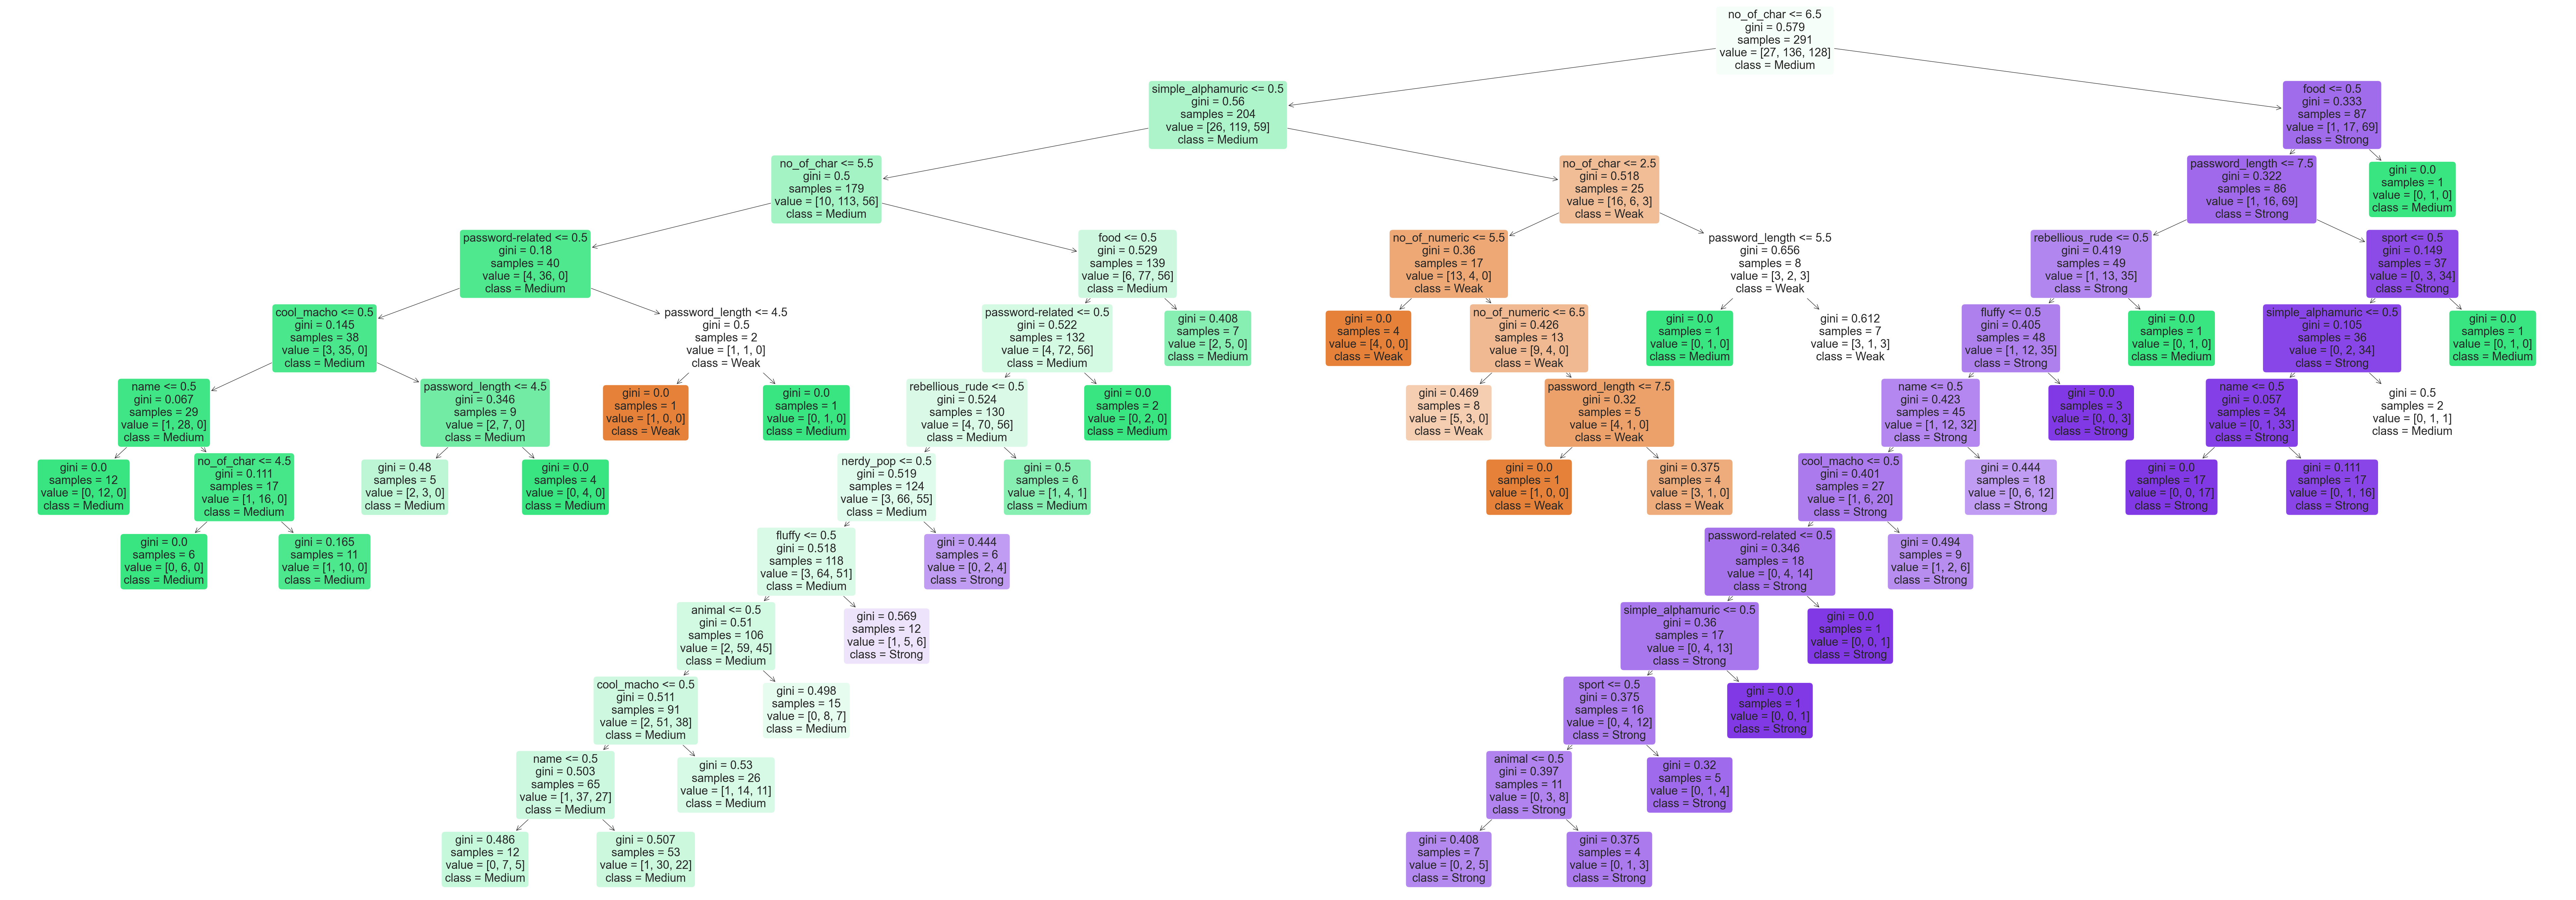

Accuracy: 0.6082474226804123
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.65      0.55        17
           1       0.56      0.68      0.61        87
           2       0.74      0.53      0.62        90

    accuracy                           0.61       194
   macro avg       0.59      0.62      0.59       194
weighted avg       0.63      0.61      0.61       194


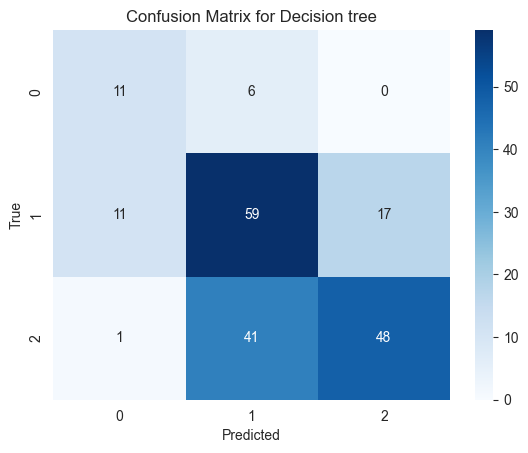

In [370]:
X_new = bad_pass_features.drop(columns= ['password', 'category', 'online_crack_min', 'offline_crack_min', 'font_size'], axis =1)
label_new = df_pswd['strength_bin']  

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_new, label_new, test_size=0.4, random_state=42)

clf_new = DecisionTreeClassifier()

clf_new.fit(X_train_2, y_train_2)

y_pred_2 = clf_new.predict(X_test_2)

plt.figure(figsize=(100,35)) 
plot_tree(clf_new, 
          feature_names= X_new.columns,  
          class_names=["Weak", "Medium", "Strong"],
          filled=True, rounded=True,
          fontsize=25)
plt.show()

#Evaluating the model
print(f"Accuracy: {accuracy_score(y_test_2, y_pred_2)}")
print(f"Classification Report:\n{classification_report(y_test_2, y_pred_2)}")


confusionmatrix = confusion_matrix(y_test_2, y_pred_2)
sns.heatmap(confusionmatrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Decision tree")
plt.show()


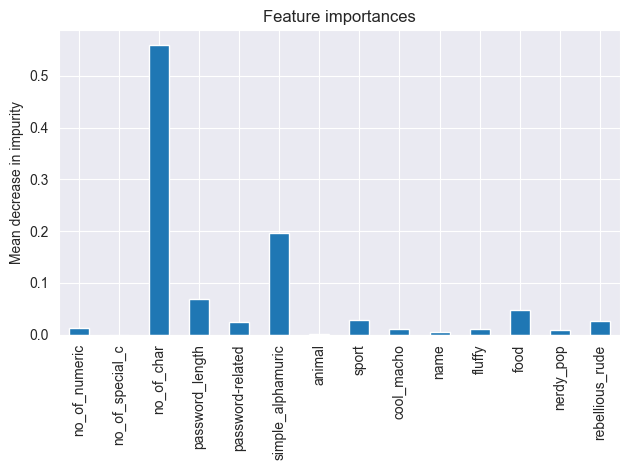

In [371]:
y =clf_new.feature_importances_
x = X_new.columns
tree_importances = pd.Series(y, index=x)
fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

* However, when using the merged dataset that combined both password classifiers and bad passwords, we recieved more accurate results. 

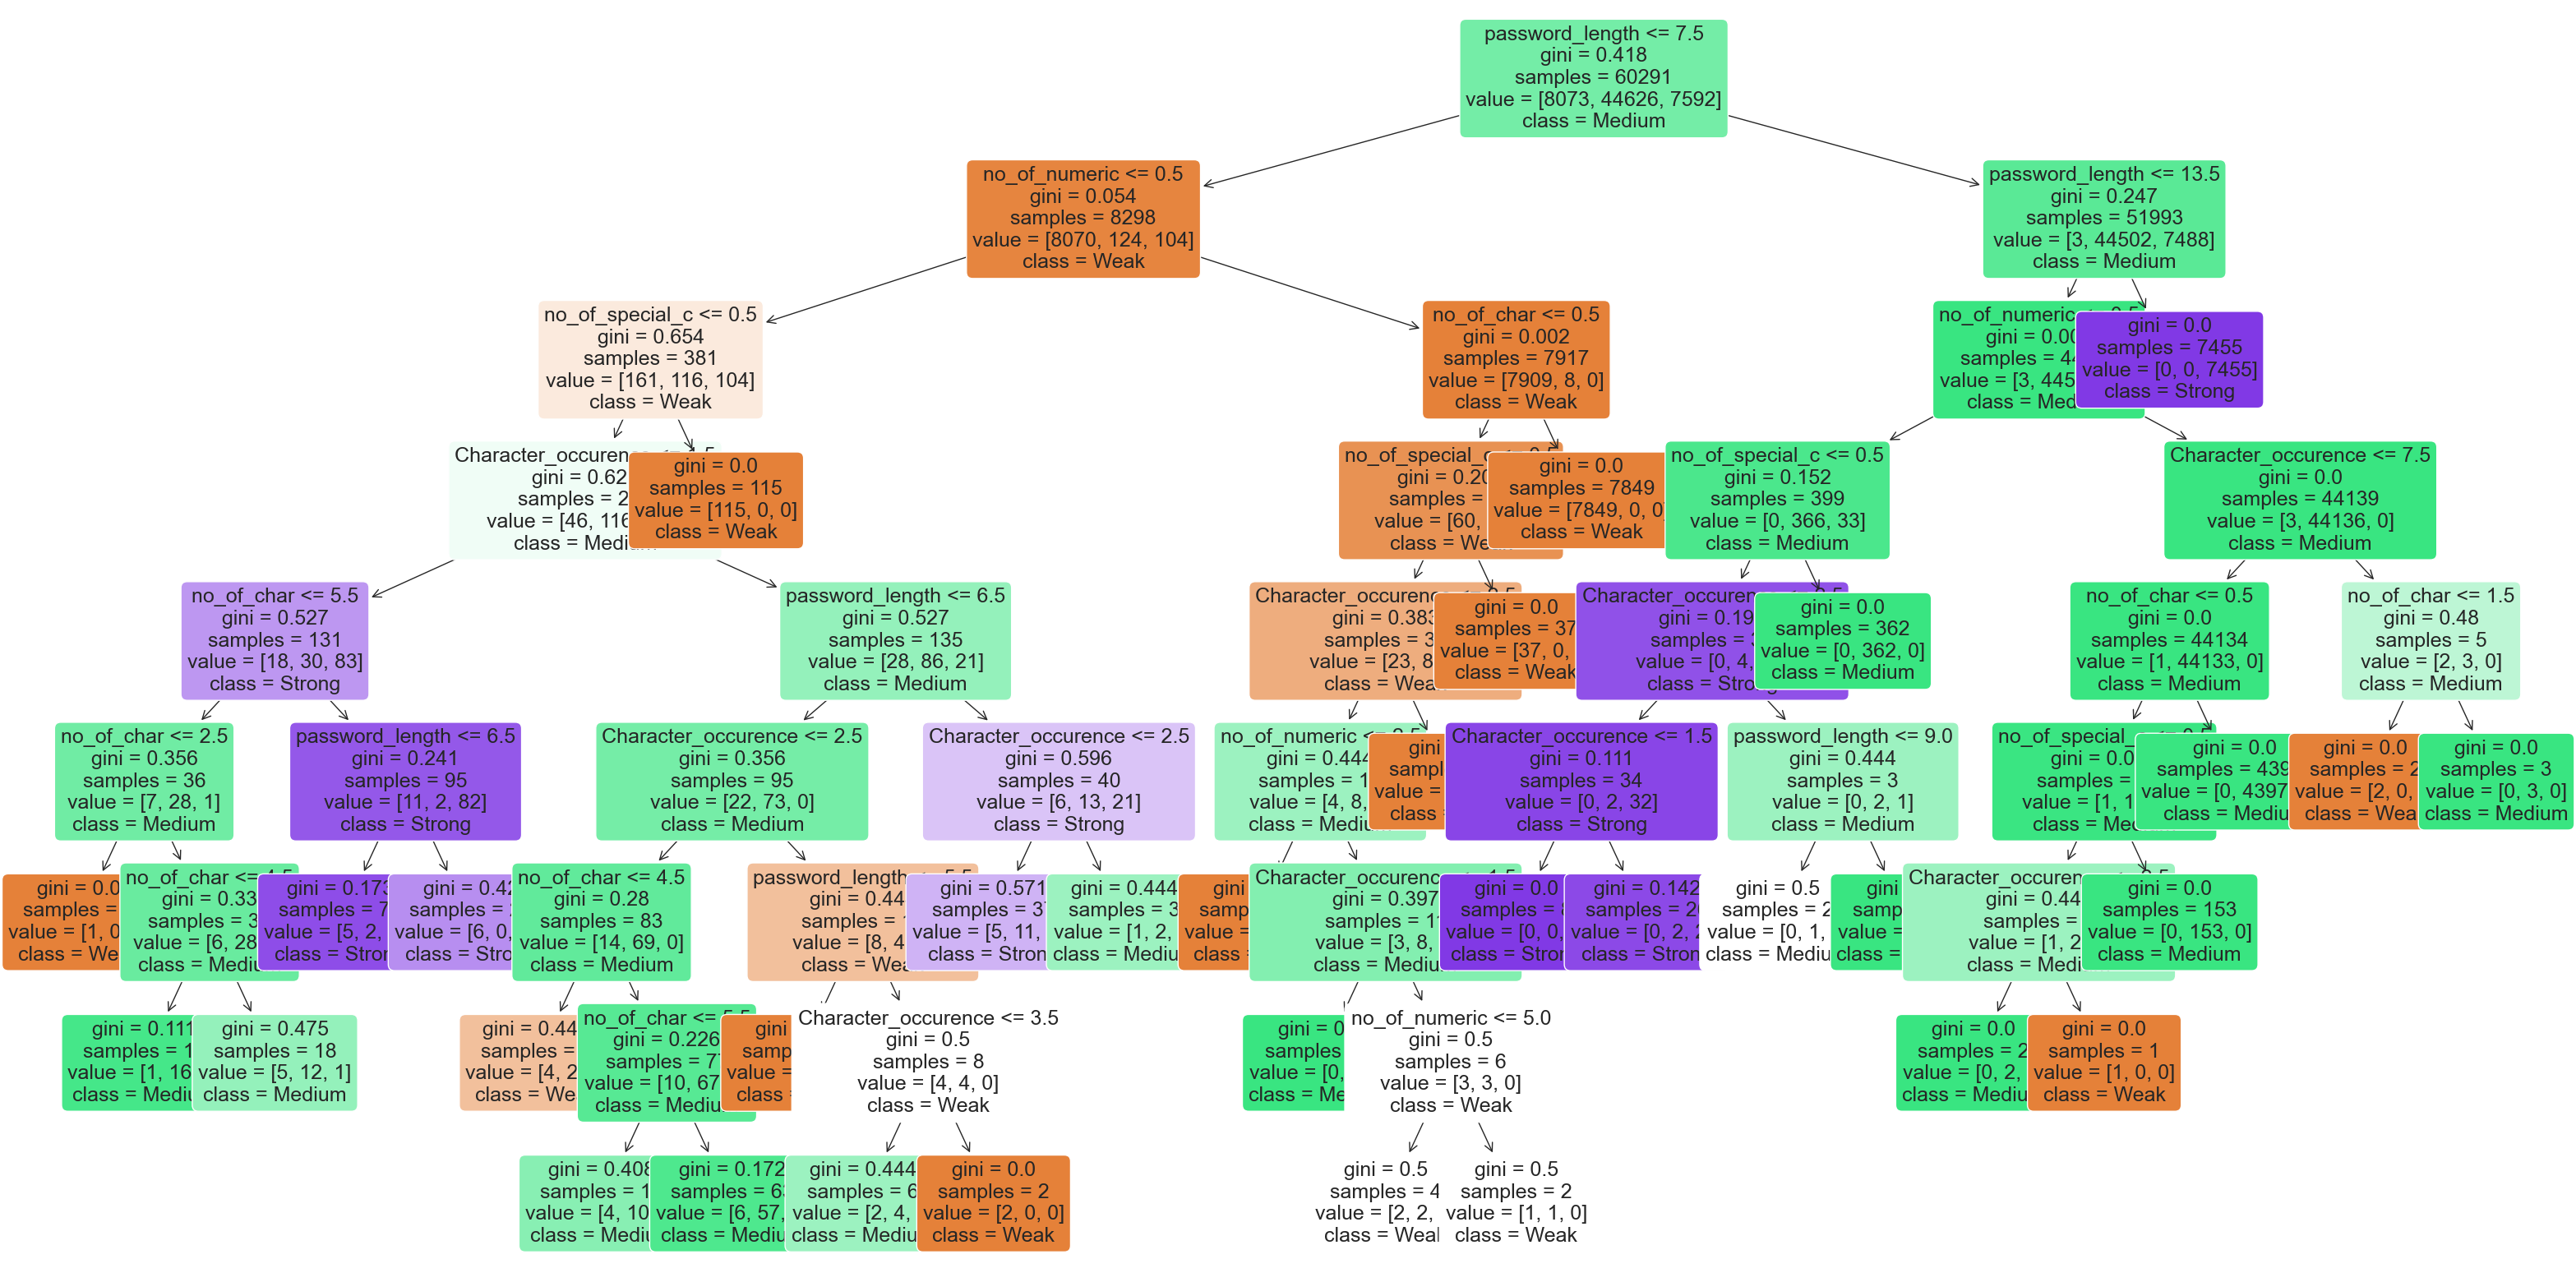

Accuracy: 0.9992038612728268
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5399
           1       1.00      1.00      1.00     29875
           2       1.00      1.00      1.00      4920

    accuracy                           1.00     40194
   macro avg       1.00      1.00      1.00     40194
weighted avg       1.00      1.00      1.00     40194


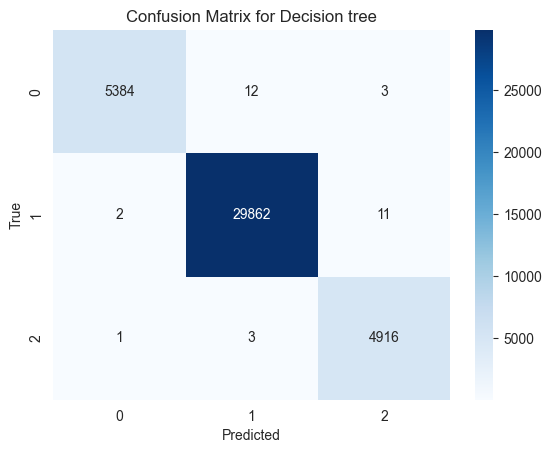

65


In [376]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(merged_features, merged_labels, test_size=0.4, random_state=42)

clf_merged = DecisionTreeClassifier(min_weight_fraction_leaf= 0.0 )

clf_merged.fit(X_train_3, y_train_3)

y_pred_merged = clf_merged.predict(X_test_3)

plt.figure(figsize=(40,20)) 
plot_tree(clf_merged, 
          feature_names= merged_features.columns,  
          class_names=["Weak", "Medium", "Strong"],
          filled=True, rounded=True,
          fontsize=18,)
plt.show()

# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test_3, y_pred_merged)}")
print(f"Classification Report:\n{classification_report(y_test_3, y_pred_merged)}")


merged_confusion_matrix = confusion_matrix(y_test_3, y_pred_merged)
sns.heatmap(merged_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix for Decision tree")
plt.show()


nodes = clf_merged.tree_
print(nodes.node_count)

In [ ]:
y =clf.feature_importances_
x = X.columns
tree_importances = pd.Series(y, index=x)
fig, ax = plt.subplots()
tree_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
plt.yscale("log")
fig.tight_layout()